In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [12]:
# load the data
benin = pd.read_csv('../data/benin_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

In [13]:
# Add a column for the country
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'
# Concatenate the dataframes
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,DHI_outlier,ModA_zscore,ModA_outlier,ModB_zscore,ModB_outlier,WS_zscore,WS_outlier,WSgust_zscore,WSgust_outlier,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,False,-0.723749,False,-0.723088,False,-1.322831,False,-1.187312,False,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,False,-0.723749,False,-0.723088,False,-1.322831,False,-1.384442,False,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,False,-0.723749,False,-0.723088,False,-1.135736,False,-0.842334,False,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,False,-0.723749,False,-0.723088,False,-1.198101,False,-1.039464,False,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,False,-0.723749,False,-0.723088,False,-1.260466,False,-1.039464,False,Benin


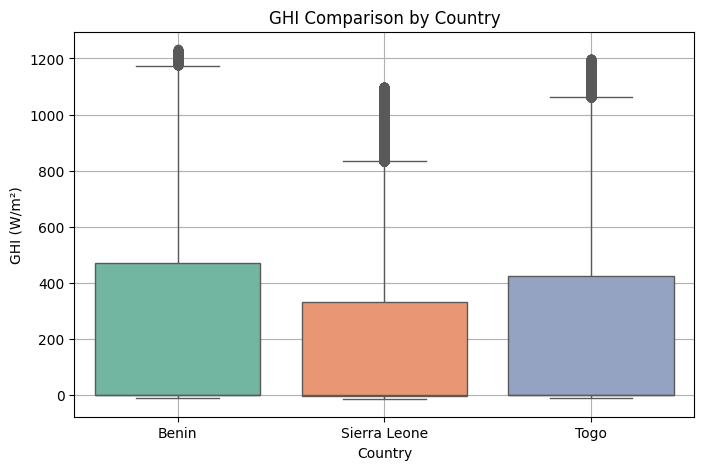

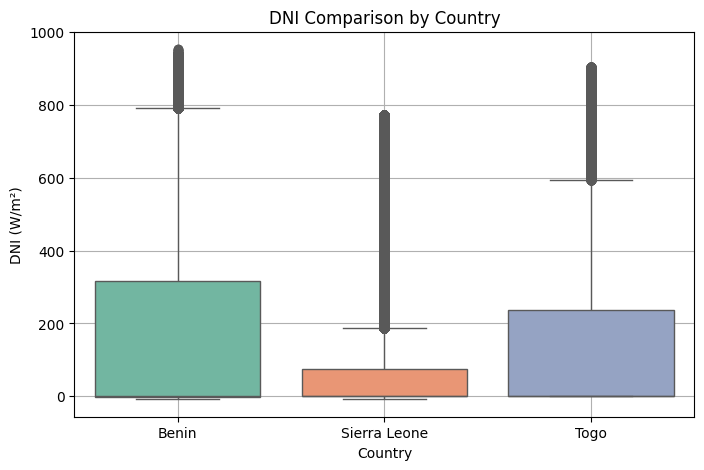

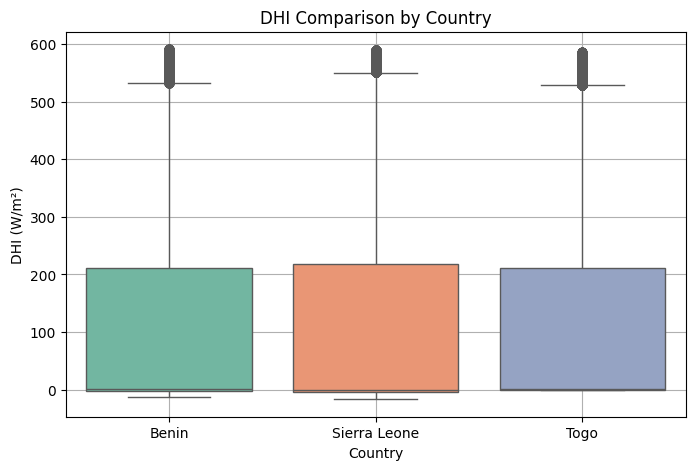

In [14]:
# Metric comparison
# Box plots

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, hue="Country", data=df, palette="Set2", legend=False)
    plt.title(f"{metric} Comparison by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.grid(True)
    plt.show()


In [15]:
#summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
# Summaary table
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
# summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [21]:
# Statistical Testing
# kruskal-wallis test

ghi_p = kruskal(
    benin["GHI"],
    sierraleone["GHI"],
    togo["GHI"]
)

print(f"Kruskal–Wallis test p-value for GHI: {ghi_p.pvalue:.4f}")


Kruskal–Wallis test p-value for GHI: 0.0000


### Key Observations
- Benin shows the highest mean GHI (236.23) but also the greatest variability (std = 328.29) and a very low median (0.7), indicating inconsistent solar potential with possible outliers.
- Togo has a strong average GHI (223.86) and the highest median GHI (0.5) among the countries, suggesting a more reliable and consistent solar resource.
- A Kruskal–Wallis test on GHI values returned a p-value of 0.0000, confirming that the differences in solar potential across the three countries are statistically significant.

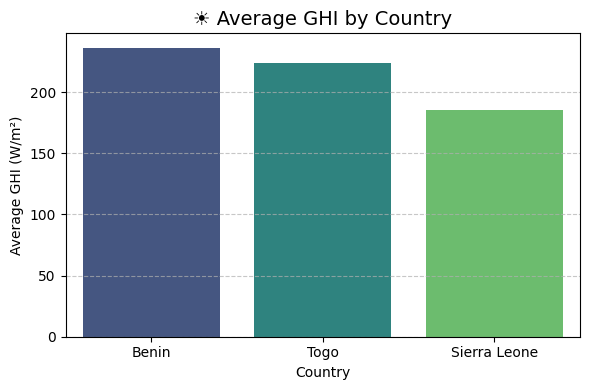

In [ ]:
# Visual Summary
# Bar Chart: Ranking Countries by Average GHI
# Calculate average GHI per country and sort descending
ghi_avg = df.groupby("Country")["GHI"].mean().sort_values(ascending=False).reset_index()

# Create the bar plot with explicit x and y
plt.figure(figsize=(6, 4))
sns.barplot(data=ghi_avg, x="Country", y="GHI", palette="viridis", hue='Country', legend=False)

# Add titles and labels
plt.title("☀️ Average GHI by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Average GHI (W/m²)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
